In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from cycler import cycle

%matplotlib inline

In [2]:
q_c  = np.linspace(0, 1)
I = np.sin(q_c*np.pi)**2

c = 20.88
d = 4.07


def q_c_to_L(q_c):
    L = (q_c + 5.)*c/d
    return L


def convert_ax_q_L(ax_q_c):
    """
    Update second axis according with first axis.
    """
    x1, x2 = ax_q_c.get_xlim()
    ax_L.set_xlim(q_c_to_L(x1), q_c_to_L(x2))
    ax_L.figure.canvas.draw()

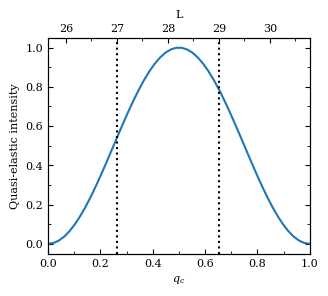

In [3]:
fig, ax_q_c = plt.subplots(figsize=(3+3/8, 2.8))
ax_L = ax_q_c.twiny()

ax_q_c.callbacks.connect("xlim_changed", convert_ax_q_L)

ax_q_c.plot(q_c, I)
ax_q_c.set_xlim(0, 1)

ax_q_c.set_xlabel(r'$q_c$')
ax_q_c.set_ylabel('Quasi-elastic intensity')
ax_L.set_xlabel('L')

for ax in [ax_q_c, ax_L]:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

ax_L.axvline(27, color='k', linestyle=':')
ax_L.axvline(29, color='k', linestyle=':')

fig.savefig('ex_19_two_units.pdf', dpi=1200)